In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
import copy

from mpl_toolkits.mplot3d import Axes3D
import matplotlib

In [2]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

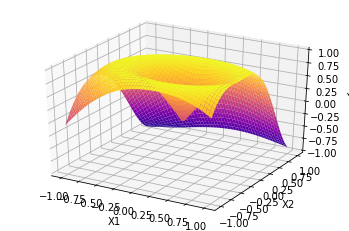

In [3]:
####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

## With BatchNormalization1

It excludes multiplier in the BatchNorm,

--This is because the multiplier is not essential for RELU, the multiplication factor is included in next layer

In [4]:
optim = tnn.Adam(0.03)
net = tnn.AutoForm(new_layers=True)
linear1 = tnn.WeightsLayer(2, 5, optimizer=optim)
# bn1 = tnn.TBatchNorm1(5, optimizer=optim)
bn1 = tnn.BatchNormalization1(5, optimizer=optim)
# bias1 = tnn.BiasLayer(5, optimizer=optim)
relu1 = tnn.Relu()
linear2 = tnn.WeightsLayer(5, 5, optimizer=optim)
bn2 = tnn.BatchNormalization1(5, optimizer=optim)
# bias2 = tnn.BiasLayer(5, optimizer=optim)
relu2 = tnn.Relu()
linear3 = tnn.LinearLayer(5, 1, optimizer=optim)

In [5]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    net.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.8390739219982364


100 Error =  0.019261062934325147


TclError: invalid command name "."

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
yout = net.forward(xx)
error = ((yout-yy)**2).mean()
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
fig.show()
print(error)

In [ ]:
bn2.adder.bias

Works but the, not usable for other activations such as sigmoid and tanh

## With TBatchNorm

TBatchNorm uses running averages of mean and variance for normalizing.

The gradient is also seprated from mean and variance.

In [4]:
optim = tnn.Adam(0.01)
net = tnn.AutoForm(new_layers=True)
linear1 = tnn.WeightsLayer(2, 5, optimizer=optim)
bn1 = tnn.TBatchNorm(5, optimizer=optim)
relu1 = tnn.Relu()
linear2 = tnn.WeightsLayer(5, 5, optimizer=optim)
bn2 = tnn.TBatchNorm(5, optimizer=optim)
relu2 = tnn.Relu()
linear3 = tnn.LinearLayer(5, 1, optimizer=optim)

In [5]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    net.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  1.348821689453296


100 Error =  0.04119688651310486


200 Error =  0.009773015602656011


300 Error =  0.00827053806112075


400 Error =  0.00698291335382242


500 Error =  0.01532223151890916


600 Error =  0.006697727173127703


700 Error =  0.014021291362308227


800 Error =  0.012015882745024022


900 Error =  0.01072844137101602


1000 Error =  0.009965778945753278


1100 Error =  0.009118924964254026


1200 Error =  0.008314955954214678


1300 Error =  0.0077003811851475345


1400 Error =  0.00744285841389949


1500 Error =  0.007657353814303771


1600 Error =  0.0067391421449970726


1700 Error =  0.006194377701009887


1800 Error =  0.00585381802146996


1900 Error =  0.005675843518426835


2000 Error =  0.0055773238988445755


2100 Error =  0.005457226317634613


2200 Error =  0.005328098687486727


2300 Error =  0.005223737797736914


2400 Error =  0.005147839574046987


2500 Error =  0.005136991385535537


2600 Error =  0.005290813446560212


2700 Error =  0.0052

TclError: invalid command name "."

/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


0.00524824552544964


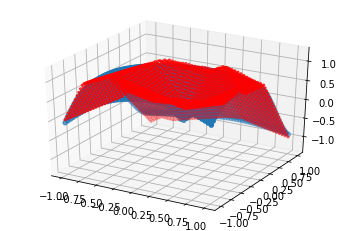

In [6]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
fig.show()
print(error)

Works but the optimization is not well and NOT RELIABLE Optimization

## With TBatchNorm1

It is same as batchNorm but the gradient is not propagated through mean and variance

small: first addition and scaling is done,, should not matter much

In [7]:
optim = tnn.Adam(0.01)
net = tnn.AutoForm(new_layers=True)
linear1 = tnn.WeightsLayer(2, 5, optimizer=optim)
bn1 = tnn.TBatchNorm1(5, optimizer=optim)
relu1 = tnn.Relu()
linear2 = tnn.WeightsLayer(5, 5, optimizer=optim)
bn2 = tnn.TBatchNorm1(5, optimizer=optim)
relu2 = tnn.Relu()
linear3 = tnn.LinearLayer(5, 1, optimizer=optim)

In [8]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    net.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  2.0643416335028753


100 Error =  0.1472698128890846


200 Error =  0.02235961741192317


300 Error =  0.01719500155569013


400 Error =  0.01614439745401233


500 Error =  0.017634459839948057


600 Error =  0.015876014025406043


700 Error =  0.014155098953350273


800 Error =  0.013230551290551852


900 Error =  0.012754664227580668


1000 Error =  0.012483512053994764


1100 Error =  0.011953334063999663


1200 Error =  0.01159270789619982


1300 Error =  0.012621000329534846


1400 Error =  0.01006702809151797


1500 Error =  0.009419330888055235


1600 Error =  0.01083112815503553


1700 Error =  0.010105340757709075


1800 Error =  0.007609219312342674


1900 Error =  0.00728651988684791


2000 Error =  0.007105305906829628


2100 Error =  0.006969511616257657


2200 Error =  0.006859703508029091


2300 Error =  0.006916171267712287


2400 Error =  0.007781961276160547


2500 Error =  0.007259238627628983


2600 Error =  0.006621655291401313


2700 Error =  0.00664752

TclError: invalid command name "."

/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


0.006097561884486992


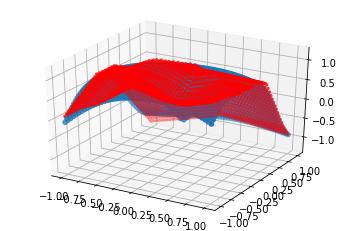

In [9]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
fig.show()
print(error)

Similar to TBatchNorm, the optimization is more reliable, but gets stuck more

## With TBatchNorm2

Same as TBatchNorm but propagates gradient through running mean

In [4]:
optim = tnn.Adam(0.01)
net = tnn.AutoForm(new_layers=True)
linear1 = tnn.WeightsLayer(2, 5, optimizer=optim)
bn1 = tnn.TBatchNorm2(5, optimizer=optim)
relu1 = tnn.Relu()
linear2 = tnn.WeightsLayer(5, 5, optimizer=optim)
bn2 = tnn.TBatchNorm2(5, optimizer=optim)
relu2 = tnn.Relu()
linear3 = tnn.LinearLayer(5, 1, optimizer=optim)

In [5]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    net.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  1.3636779491722133


100 Error =  0.06135048221804476


200 Error =  0.028470182633238146


300 Error =  0.024176913095426633


400 Error =  0.022279737021009532


500 Error =  0.021262225184415708


600 Error =  0.020579171691924088


700 Error =  0.02008244153032047


800 Error =  0.01910227245880558


900 Error =  0.0186407363642354


1000 Error =  0.018033903504350607


1100 Error =  0.017351884230295902


1200 Error =  0.014770504158551972


1300 Error =  0.014163731716747077


1400 Error =  0.011145794276844713


1500 Error =  0.006635352068987152


1600 Error =  0.005824560864533309


1700 Error =  0.00529704665052939


1800 Error =  0.004809399386775624


1900 Error =  0.004408310009098094


2000 Error =  0.00407727903897018


2100 Error =  0.0037217364851072723


2200 Error =  0.0030644560643833755


2300 Error =  0.0028446316286569974


2400 Error =  0.002720838715110088


2500 Error =  0.0026384703891455153


2600 Error =  0.002575886933421453


TclError: invalid command name "."

/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


0.002575886933421453


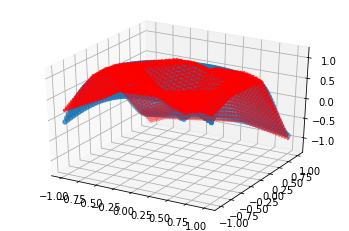

In [6]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
fig.show()
print(error)

Works Like A Charm.. maybe better optimization 